In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyhyrec as pyhy

In [2]:
inj_params = pyhy.init_INPUT_INJ_PARAMS(0., 0., 0., 0., 0., 0., 0., 0, 0., 1., 0.)
cosmo_params = pyhy.init_INPUT_COSMOPARAMS(6.735837e-01, 2.7255, 0.0494142797907188, 0.31242079216478097, 0., -1, 0, 3.046, 1.0, 0.06, 0., 0., 0.245, 1., 1.)

z, xe, Tm = pyhy.call_run_hyrec(cosmo_params, inj_params)

In [3]:
data = np.loadtxt("./tests/output_xe.dat")

z_c = np.flip(data[:, 0])
xe_c = np.flip(data[:, 1])
Tm_c = np.flip(data[:, 2])

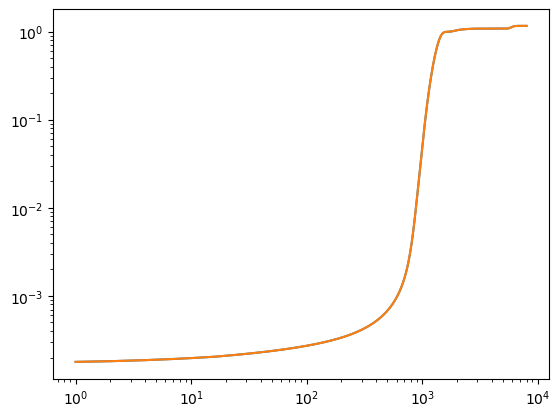

In [4]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca()

ax.plot(z, xe)
ax.plot(z_c, xe_c)
#ax.plot(z, abs(xe-xe_c)/xe_c)
ax.set_xscale("log")
ax.set_yscale("log")

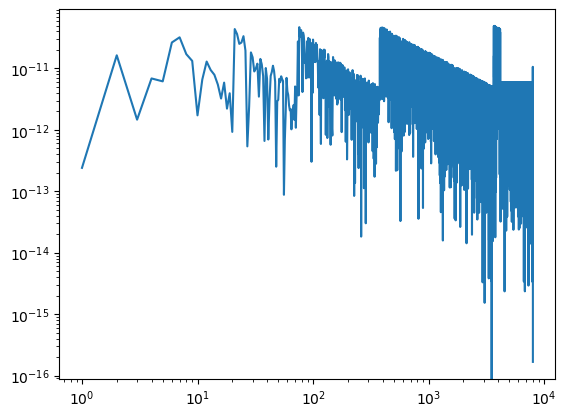

In [5]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca()

#ax.plot(z, Tm)
#ax.plot(z_c, Tm_c)
ax.plot(z, abs(Tm-Tm_c)/Tm_c)
#ax.plot(z, 2.7255 * (1+z), color='k', linestyle='-.')
ax.set_xscale("log")
ax.set_yscale("log")